<a href="https://colab.research.google.com/github/KenDaupsey/Principal-Factor-Analysis-PFA-Using-Python/blob/main/Principal_Factor_Analysis_(PFA)_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Principal Factor Analysis (PFA) in Python** ***

In [1]:
### Import Necessary Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Principal-Factor-Analysis-PFA-Using-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocation,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocation,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [3]:
df.columns

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   race     200 non-null    object
 3   ses      200 non-null    object
 4   schtyp   200 non-null    object
 5   prog     200 non-null    object
 6   read     200 non-null    int64 
 7   write    200 non-null    int64 
 8   math     200 non-null    int64 
 9   science  200 non-null    int64 
 10  socst    200 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.3+ KB


In [5]:
### Install necessary library
!pip install factor_analyzer

In [6]:
# Import necessary library
from factor_analyzer.factor_analyzer import calculate_kmo

# Factor analysis
from factor_analyzer import FactorAnalyzer

# Create FactorAnalyzer object
fa = FactorAnalyzer()

# Select the variables for factor analysis
X_factor = df[['read', 'write', 'math', 'science', 'socst']]

# Calculate KMO for factor analysis
kmo_all, kmo_model = calculate_kmo(X_factor)

# Print KMO for factor analysis
print("KMO Model:", kmo_model)

KMO Model: 0.8610462905447683


In [7]:
# Factor analysis
from factor_analyzer import FactorAnalyzer

# Create FactorAnalyzer object
fa = FactorAnalyzer()

# Assuming X_factor is defined
X_factor = df[['read', 'write', 'math', 'science', 'socst']]

# Perform factor analysis
fa.fit(X_factor)

# Print explained variance
print(fa.get_factor_variance())

(array([1.25787849, 0.73986861, 0.4781838 ]), array([0.2515757 , 0.14797372, 0.09563676]), array([0.2515757 , 0.39954942, 0.49518618]))


In [8]:
# Print factor loadings
print(fa.loadings_)

[[ 0.51137849  0.52601119 -0.12886603]
 [ 0.20251801  0.135675    0.5739055 ]
 [ 0.58047397  0.10960695  0.18351489]
 [ 0.78071748 -0.0763629   0.10734551]
 [-0.0942718   0.65339739  0.29497296]]


In [9]:
# Rotate factors to make loadings more interpretable
fa_rotated = FactorAnalyzer(rotation="varimax")
fa_rotated.fit(df[['read','write','math','science','socst']])

print(fa_rotated.loadings_)

[[0.6144753  0.59457913 0.19728896]
 [0.4232112  0.36257534 0.61403993]
 [0.61985523 0.3499288  0.37170869]
 [0.70133513 0.23278126 0.30817004]
 [0.265188   0.62807787 0.43130398]]


In [10]:
print(fa_rotated.get_factor_variance())

(array([1.50310375, 1.0561043 , 0.83512722]), array([0.30062075, 0.21122086, 0.16702544]), array([0.30062075, 0.51184161, 0.67886705]))


*** Entire Code for Principal Factor Analysis ***

KMO Model: 0.8610462905447683
Factor Loadings:
[[ 0.51137849  0.52601119 -0.12886603]
 [ 0.20251801  0.135675    0.5739055 ]
 [ 0.58047397  0.10960695  0.18351489]
 [ 0.78071748 -0.0763629   0.10734551]
 [-0.0942718   0.65339739  0.29497296]]
Explained Variance for Factor Analysis:
(array([1.25787849, 0.73986861, 0.4781838 ]), array([0.2515757 , 0.14797372, 0.09563676]), array([0.2515757 , 0.39954942, 0.49518618]))
Factor Loadings (Rotated):
[[0.6144753  0.59457913 0.19728896]
 [0.4232112  0.36257534 0.61403993]
 [0.61985523 0.3499288  0.37170869]
 [0.70133513 0.23278126 0.30817004]
 [0.265188   0.62807787 0.43130398]]
Explained Variance for Rotated Factors:
(array([1.50310375, 1.0561043 , 0.83512722]), array([0.30062075, 0.21122086, 0.16702544]), array([0.30062075, 0.51184161, 0.67886705]))


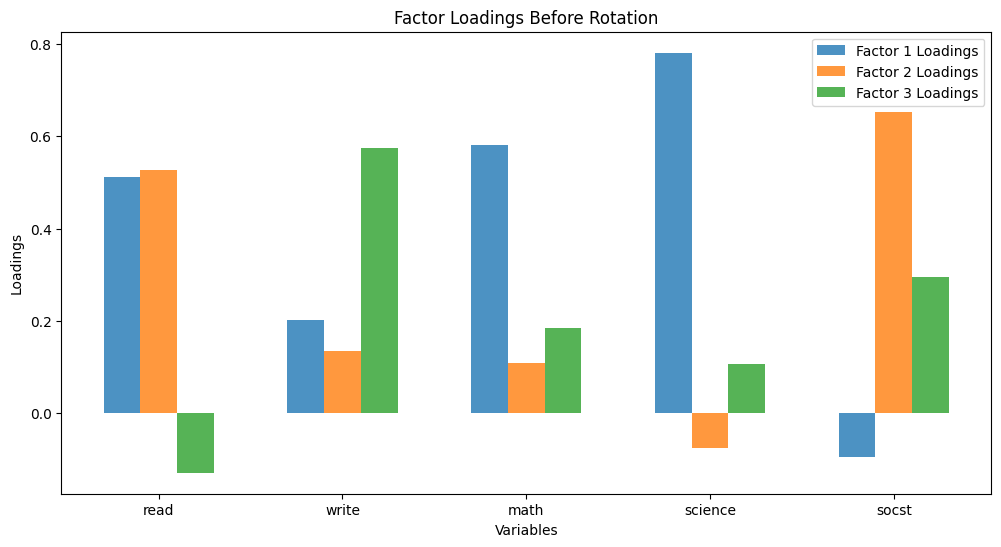

In [11]:
###  The entire code for this procedure
# Install necessary library
#!pip install factor_analyzer

# Import necessary libraries
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
#df = pd.read_csv('your_dataset.csv')

# Select the variables for factor analysis
X_factor = df[['read', 'write', 'math', 'science', 'socst']]

# ------------------------------
# Factor Analysis
# ------------------------------

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(X_factor)

# Calculate KMO for factor analysis
kmo_all, kmo_model = calculate_kmo(X_factor)

# Print KMO for factor analysis
print("KMO Model:", kmo_model)

# Print factor loadings for factor analysis
print("Factor Loadings:")
print(fa.loadings_)

# Print explained variance for factor analysis
print("Explained Variance for Factor Analysis:")
print(fa.get_factor_variance())

# Rotate factors to make loadings more interpretable
fa_rotated = FactorAnalyzer(rotation="varimax")
fa_rotated.fit(X_factor)

# Print loadings and explained variance for rotated factors
print("Factor Loadings (Rotated):")
print(fa_rotated.loadings_)

print("Explained Variance for Rotated Factors:")
print(fa_rotated.get_factor_variance())

#Additional stuff:

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# Bar plot for factor loadings before rotation
plt.figure(figsize=(12, 6))
for i in range(fa.loadings_.shape[1]):
    plt.bar(np.arange(len(X_factor.columns)) + 0.2 * i, fa.loadings_[:, i], width=0.2, alpha=0.8, label=f'Factor {i + 1} Loadings')

plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.title('Factor Loadings Before Rotation')
plt.xticks(np.arange(len(X_factor.columns)) + 0.2, X_factor.columns)
plt.legend()
plt.show()

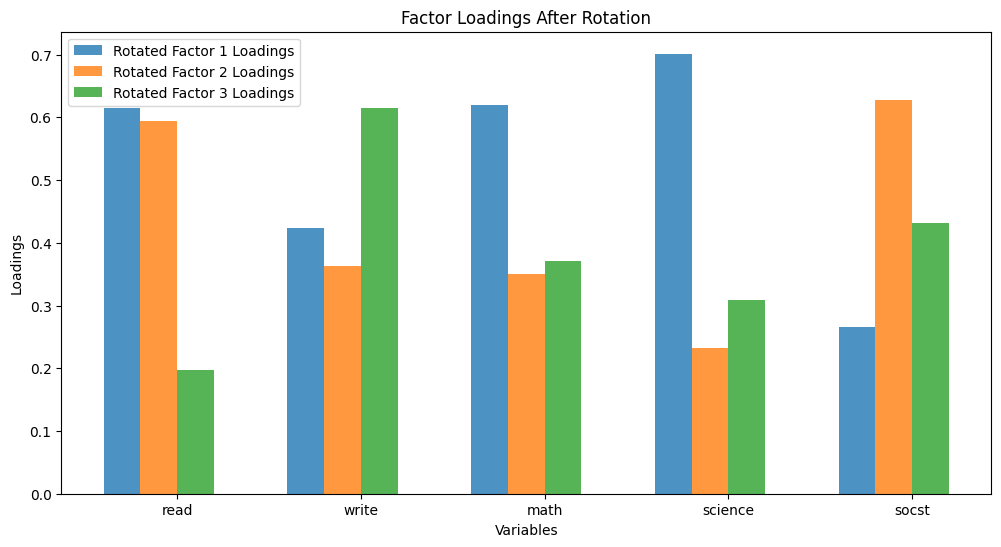

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Bar plot for factor loadings after rotation
plt.figure(figsize=(12, 6))
for i in range(fa_rotated.loadings_.shape[1]):
    plt.bar(np.arange(len(X_factor.columns)) + 0.2 * i, fa_rotated.loadings_[:, i], width=0.2, alpha=0.8, label=f'Rotated Factor {i + 1} Loadings')

plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.title('Factor Loadings After Rotation')
plt.xticks(np.arange(len(X_factor.columns)) + 0.2 * (fa_rotated.loadings_.shape[1] / 2), X_factor.columns)
plt.legend()
plt.show()

## *** The End ***